In [6]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

Running on: cuda:0


In [7]:
time_window = 50
batch_size = 32 # 128: anil kag

ckpt_dir = 'multiaddtask_04_2025_tests'

dataset = 'multiaddtask_episodic'

num_epochs = 1000 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

Initializing GPU cache for 32000 samples...
Cache initialized in 3.87 seconds
Initializing GPU cache for 32 samples...
Cache initialized in 0.00 seconds
torch.Size([32, 50, 3])
torch.Size([32, 5, 1])


In [8]:
num_h = 64

tau_m = 'log-uniform-st'

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window, tau_m=tau_m,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window, tau_m=tau_m,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
snn_rnn.to(device)

extra_kwargs = {'delay_range':(18, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window, tau_m=tau_m,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
snn_rd.to(device)

Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=1152, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=1, bias=False)
    )
  )
)

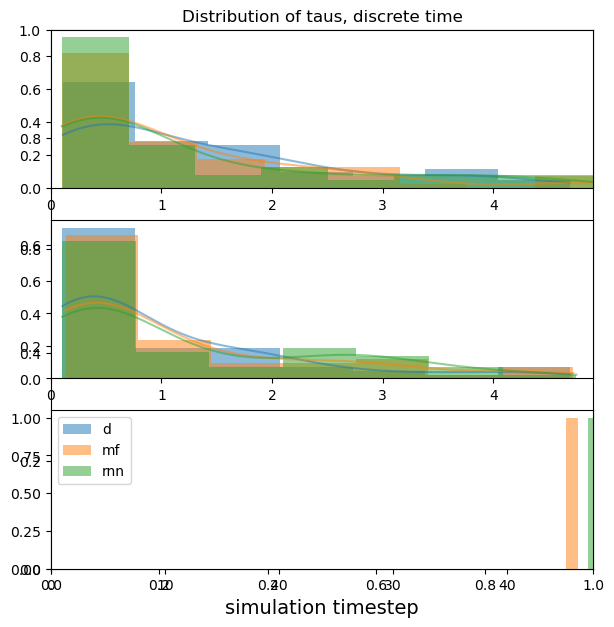

In [9]:
from snn_delays.utils.visualization_utils import plot_taus_refact, plot_param

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plot_taus_refact(snn_rd, label='d')
plot_taus_refact(snn_f, label='mf')
plot_taus_refact(snn_rnn, label='rnn')
plt.legend()

Trainable tau

In [10]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)

Epoch [1/1], learning_rates 0.001000, 1.000000
Step [10/1000], Loss: 0.15189
Step [20/1000], Loss: 0.10642
Step [30/1000], Loss: 0.06050
Step [40/1000], Loss: 0.07404
Step [50/1000], Loss: 0.06459
Step [60/1000], Loss: 0.04553
Step [70/1000], Loss: 0.06372
Step [80/1000], Loss: 0.02970
Step [90/1000], Loss: 0.02593
Step [100/1000], Loss: 0.03214
Step [110/1000], Loss: 0.05114
Step [120/1000], Loss: 0.04051
Step [130/1000], Loss: 0.04860
Step [140/1000], Loss: 0.03605
Step [150/1000], Loss: 0.04500
Step [160/1000], Loss: 0.04257
Step [170/1000], Loss: 0.02425
Step [180/1000], Loss: 0.04109
Step [190/1000], Loss: 0.03484
Step [200/1000], Loss: 0.02926
Step [210/1000], Loss: 0.04156
Step [220/1000], Loss: 0.03757
Step [230/1000], Loss: 0.02799
Step [240/1000], Loss: 0.03089
Step [250/1000], Loss: 0.03995
Step [260/1000], Loss: 0.03747
Step [270/1000], Loss: 0.02859
Step [280/1000], Loss: 0.04838
Step [290/1000], Loss: 0.02892
Step [300/1000], Loss: 0.04707
Step [310/1000], Loss: 0.02085
S

In [11]:
snn_f.train_loss

[[9, 0.5957123041152954],
 [19, 0.305612713098526],
 [29, 0.14660127460956573],
 [39, 0.07196296751499176],
 [49, 0.030201975256204605],
 [59, 0.041411492973566055],
 [69, 0.03544347360730171],
 [79, 0.0363563634455204],
 [89, 0.04427458718419075],
 [99, 0.041744522750377655],
 [109, 0.026069864630699158],
 [119, 0.026480669155716896],
 [129, 0.03728783130645752],
 [139, 0.03951055556535721],
 [149, 0.022355401888489723],
 [159, 0.03350979462265968],
 [169, 0.05012713745236397],
 [179, 0.031061530113220215],
 [189, 0.029601767659187317],
 [199, 0.04852758347988129],
 [209, 0.03183165192604065],
 [219, 0.03859425336122513],
 [229, 0.032621365040540695],
 [239, 0.026511961594223976],
 [249, 0.01805545762181282],
 [259, 0.041509855538606644],
 [269, 0.02405177615582943],
 [279, 0.02414710633456707],
 [289, 0.04339335113763809],
 [299, 0.02463098242878914],
 [309, 0.036016494035720825],
 [319, 0.030615657567977905],
 [329, 0.03500250354409218],
 [339, 0.0202938225120306],
 [349, 0.03537146

Text(0.5, 1.0, 'train loss')

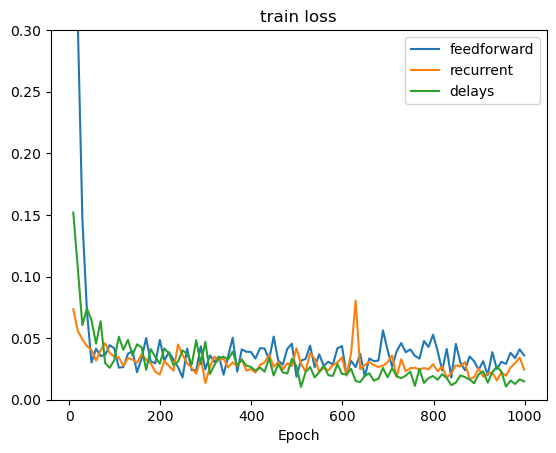

In [12]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')
plt.ylim(0, 0.3)
#
plt.title('train loss')

Frozen taus

In [13]:
num_h = 64

tau_m = 'log-uniform-st'

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window, tau_m=tau_m,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window, tau_m=tau_m,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
snn_rnn.to(device)

extra_kwargs = {'delay_range':(18, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window, tau_m=tau_m,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
snn_rd.to(device)

lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100, freeze_taus=True)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100, freeze_taus=True)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100, freeze_taus=True)

Epoch [1/1], learning_rates 0.001000, 1.000000
Step [10/1000], Loss: 0.73431
Step [20/1000], Loss: 1.01669
Step [30/1000], Loss: 0.21031
Step [40/1000], Loss: 0.20681
Step [50/1000], Loss: 0.05260
Step [60/1000], Loss: 0.10709
Step [70/1000], Loss: 0.04582
Step [80/1000], Loss: 0.07409
Step [90/1000], Loss: 0.04013
Step [100/1000], Loss: 0.03681
Step [110/1000], Loss: 0.04239
Step [120/1000], Loss: 0.06232
Step [130/1000], Loss: 0.05592
Step [140/1000], Loss: 0.04796
Step [150/1000], Loss: 0.04736
Step [160/1000], Loss: 0.03528
Step [170/1000], Loss: 0.05533
Step [180/1000], Loss: 0.04323
Step [190/1000], Loss: 0.04584
Step [200/1000], Loss: 0.06575
Step [210/1000], Loss: 0.04536
Step [220/1000], Loss: 0.06306
Step [230/1000], Loss: 0.06222
Step [240/1000], Loss: 0.03302
Step [250/1000], Loss: 0.04793
Step [260/1000], Loss: 0.03910
Step [270/1000], Loss: 0.05421
Step [280/1000], Loss: 0.03989
Step [290/1000], Loss: 0.05332
Step [300/1000], Loss: 0.04309
Step [310/1000], Loss: 0.02357
S

Text(0.5, 1.0, 'train loss')

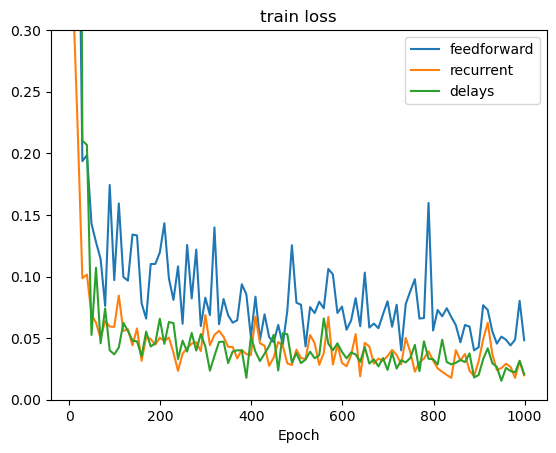

In [14]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')
plt.ylim(0, 0.3)
plt.title('train loss')

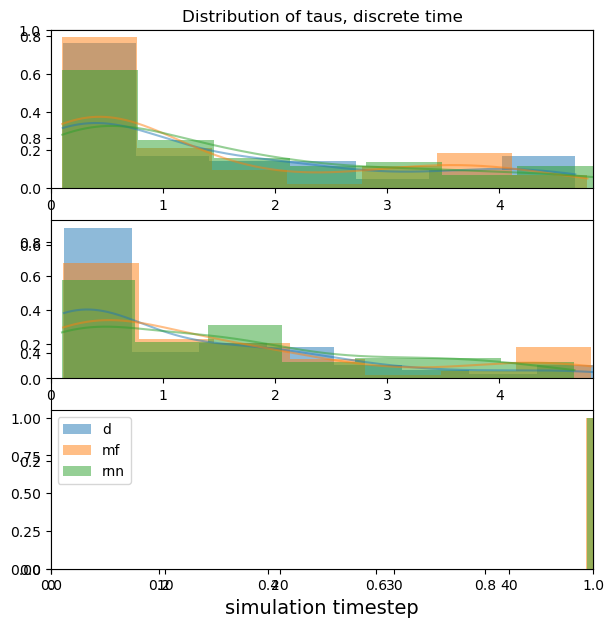

In [15]:
from snn_delays.utils.visualization_utils import plot_taus_refact
plt.figure(figsize=(7,7))
plot_taus_refact(snn_rd, label='d')
plot_taus_refact(snn_f, label='mf')
plot_taus_refact(snn_rnn, label='rnn')
plt.legend()

In [16]:
snn_f.debug = True
snn_rnn.debug = True
snn_rd.debug = True
snn_f.init_state_logger()
snn_rnn.init_state_logger()
snn_rd.init_state_logger()

from snn_delays.utils.train_utils_refact_minimal import propagate_batch_simple
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
_, labels_rnn = propagate_batch_simple(snn_rnn, test_loader)
_, labels_rd = propagate_batch_simple(snn_rd, test_loader)

In [17]:
ref_mf = labels_mf[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_mf = snn_f.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rd = labels_rd[:,:int(0.1*time_window),:].permute(1, 0, 2).cpu().numpy()
out_rd = snn_rd.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)

def plot_add_task(output, reference, N, axes=None, name=''):

    ns = 50 # num samples to display for better viz

    ref = reference[:, :ns , N]
    out = output[:, :ns , N]
    diff = abs(ref-out)

    print(np.mean(diff))

    if axes is None:
        fig, axes = plt.subplots(3, 1, figsize=(5, 10))  # Create a new figure if axes not provided

    axes[0].imshow(ref, vmin=0, vmax=1.8)
    axes[0].set_title('Reference '+name)
    axes[0].set_ylabel('Time')

    axes[1].imshow(out, vmin=0, vmax=1.8)
    axes[1].set_title('Output')
    axes[1].set_ylabel('Time')

    axes[2].imshow(diff, vmin=0.0, vmax=0.5)
    axes[2].set_title('Difference')
    axes[2].set_ylabel('Time')
    axes[2].set_xlabel('Training Sample')

    return axes  # Return the axes to be used in an external figure

0.16350007
0.11590803
0.15017045


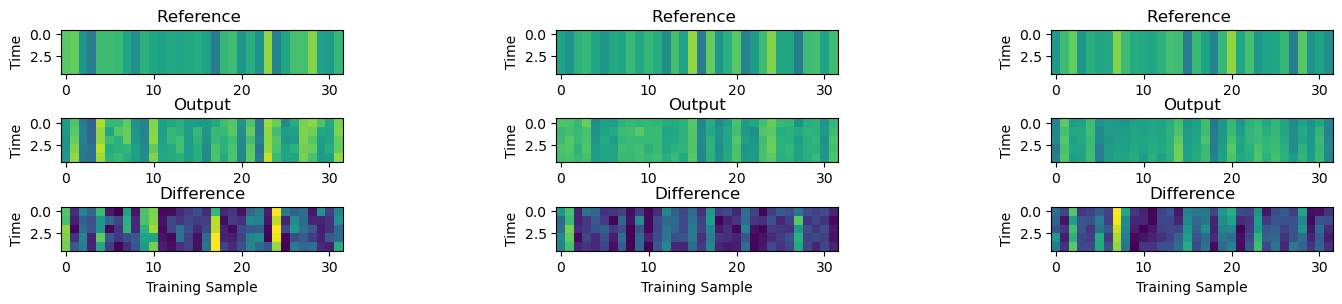

In [18]:
out_neuron = 0

fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, out_neuron, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, out_neuron, axes[:, 1])  
plot_add_task(out_rd, ref_rd, out_neuron, axes[:, 2])  

plt.tight_layout()
plt.show()

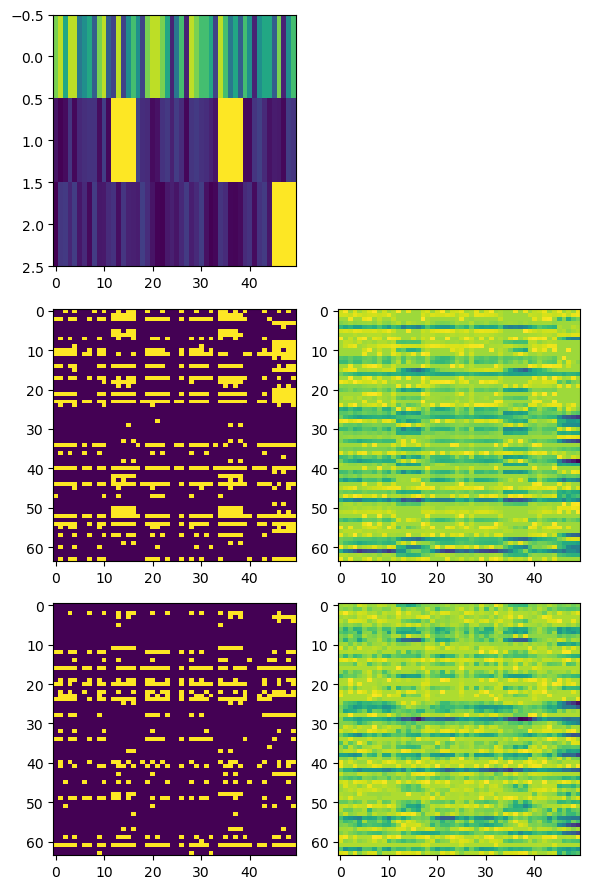

In [19]:
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
spk = snn_f.spike_state
mem = snn_f.mem_state

N = 0

plt.figure(figsize=(6,9))

plt.subplot(321)
plt.imshow(images[N].T.cpu().numpy(), aspect='auto')

plt.subplot(323, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(spk['l1'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(325, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(spk['l2'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(324, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(mem['l1'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(326, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(mem['l2'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.tight_layout()
plt.show()

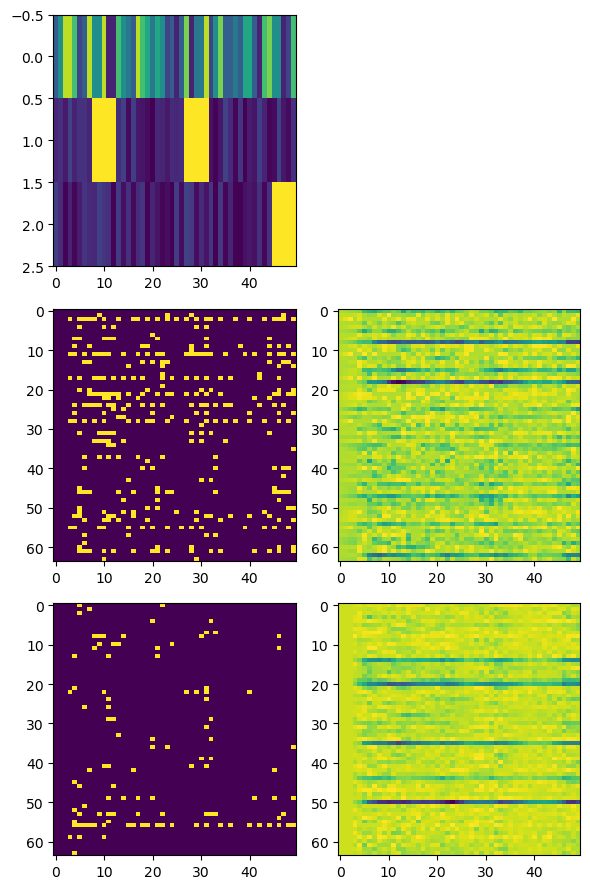

In [20]:
images, labels = propagate_batch_simple(snn_rnn, test_loader)
spk = snn_rnn.spike_state
mem = snn_rnn.mem_state
N = 0

plt.figure(figsize=(6,9))

plt.subplot(321)
plt.imshow(images[N].T.cpu().numpy(), aspect='auto')

plt.subplot(323, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(spk['l1'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(325, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(spk['l2'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(324, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(mem['l1'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(326, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(mem['l2'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.tight_layout()
plt.show()

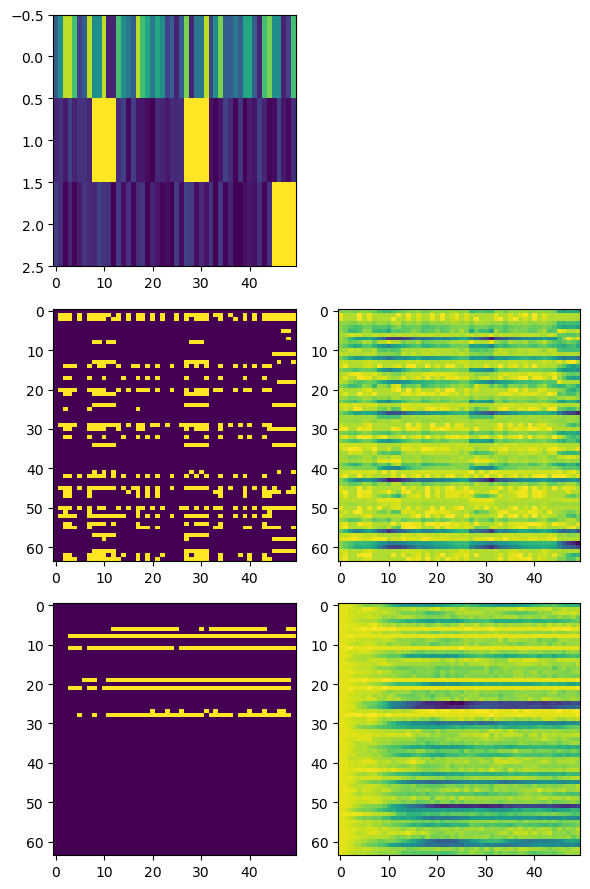

In [21]:
images, labels = propagate_batch_simple(snn_rd, test_loader)
spk = snn_rd.spike_state
mem = snn_rd.mem_state

N = 0

plt.figure(figsize=(6,9))

plt.subplot(321)
plt.imshow(images[N].T.cpu().numpy(), aspect='auto')

plt.subplot(323, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(spk['l1'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(325, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(spk['l2'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(324, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(mem['l1'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.subplot(326, sharex=plt.gca())  # Share x-axis with current axes
plt.imshow(mem['l2'][:, N, :].T.detach().cpu().numpy(), aspect='auto')

plt.tight_layout()
plt.show()